In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
from collections import Counter
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
from analyzer import AnalyzerPrediction

In [5]:
# for autoreload modules
%load_ext autoreload
%autoreload 2

In [6]:
result_df_amount = pd.read_csv('kuw3_p100_result_df_amount.csv')

In [7]:
result_df_amount

,description,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_10,p_20,rating,n_white_list,n_test_in_wl,n_test_bad_in_wl,amount_test_in_wl,amount_test_bad_in_wl,n_teach,n_teach_bad,n_test,n_test_bad,amount_test_bad,amount_test
0,3-80-0.2,2.890000,8.540000,11.540000,14.490000,18.370000,20.470000,22.380000,28.230000,47.910000,131.97,1019125,22992,34,1640236.53,6191.08,433425,6261,58862,755,120400.38,4.989361e+06
1,threshold amount,0.051372,0.040750,0.035678,0.032556,0.030584,0.028537,0.027388,0.024673,0.018998,131.97,1019125,22992,34,1640236.53,6191.08,433425,6261,58862,755,120400.38,4.989361e+06
2,3-80-0.35,3.330000,6.330000,9.220000,10.010000,16.380000,21.410000,22.640000,28.790000,42.810000,116.87,1019125,22992,34,1640236.53,6191.08,433425,6261,58862,755,120400.38,4.989361e+06
3,threshold amount,0.064287,0.049409,0.042461,0.037758,0.034774,0.032449,0.030781,0.026872,0.018819,116.87,1019125,22992,34,1640236.53,6191.08,433425,6261,58862,755,120400.38,4.989361e+06
4,3-80-0.2,0.900000,1.690000,1.950000,3.130000,3.620000,5.230000,6.570000,9.850000,20.320000,41.46,1019125,22992,34,1640236.53,6191.08,433425,6261,58862,755,120400.38,4.989361e+06
5,threshold amount,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,41.46,1019125,22992,34,1640236.53,6191.08,433425,6261,58862,755,120400.38,4.989361e+06
6,3-80-0.35,0.900000,1.690000,1.950000,3.130000,3.620000,5.230000,6.570000,9.850000,20.320000,41.46,1019125,22992,34,1640236.53,6191.08,433425,6261,58862,755,120400.38,4.989361e+06
7,threshold amount,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,41.46,1019125,22992,34,1640236.53,6191.08,433425,6261,58862,755,120400.38,4.989361e+06


In [8]:
result_df_amount['amount_test_good'] = result_df_amount.amount_test - result_df_amount.amount_test_bad

In [9]:
def get_x_y_by_row_num(result_df_amount, row_num):
    row_num = 0
    x = []
    all_p_cols = [col for  col in list(result_df_amount)  if col.startswith('p_')]
    for col in all_p_cols:
        p = result_df_amount.loc[row_num, col]
        p = int(col[2:])
        amount_bad_p = result_df_amount.amount_test_bad.values[row_num] * result_df_amount[col].values[row_num]/100
        amount_p = (result_df_amount.amount_test.values[row_num] * p)/100
        amount_good_p = amount_p - amount_bad_p
        fpr = amount_good_p/result_df_amount.amount_test_good.values[row_num]
        x.append(fpr)
    y = result_df_amount.loc[row_num, all_p_cols].values
    y = [i/100 for i in y]    
    return x, y

# Roc curve and thresholds 

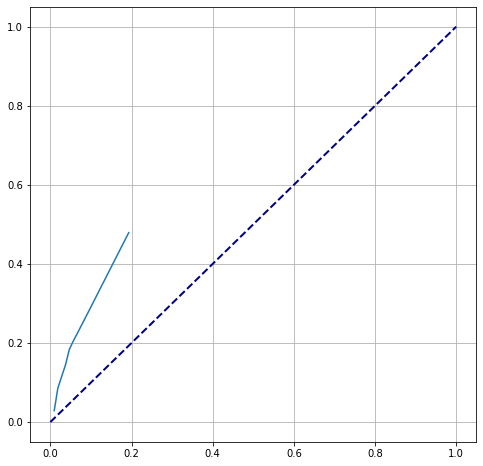

In [17]:
x, y = get_x_y_by_row_num(result_df_amount, 8)
plt.figure(figsize=(8,8))
plt.grid()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(x, y)
plt.show()